In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'API_4_DS2_en_csv_v2_3160069.csv', skiprows=4)
df = df.drop(columns=['Unnamed: 65'])

NameError: name 'settings' is not defined

In [ ]:
df.shape

(43092, 65)

In [ ]:
df['Country Name'].unique().size

266

In [ ]:
df['Indicator Code'].unique().size

162

In [ ]:
year_min = df.columns[4]
year_max = df.columns[-1]
print(f'The dataset holds data from the year {year_min} to the year {year_max}.')

The dataset holds data from the year 1960 to the year 2020.


One of the main challenges in this project will be the amount of missing data which we can observe in the following heatmap where the dark spots show the missing data.

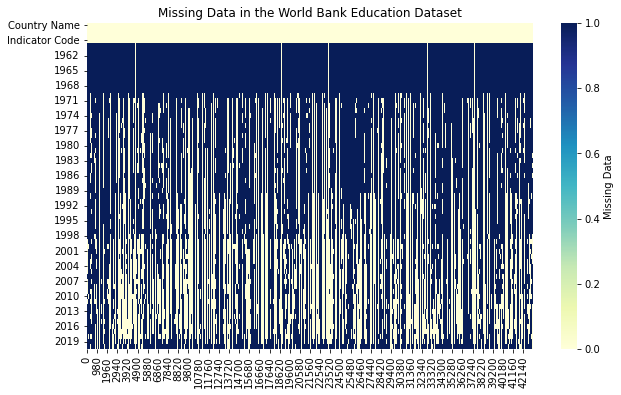

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T,
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data in the World Bank Education Dataset')
plt.show()

In [ ]:
columns_to_remove = ['Country Name', 'Country Code', 'Indicator Code'] + [str(year) for year in range(1960, 1991)]
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

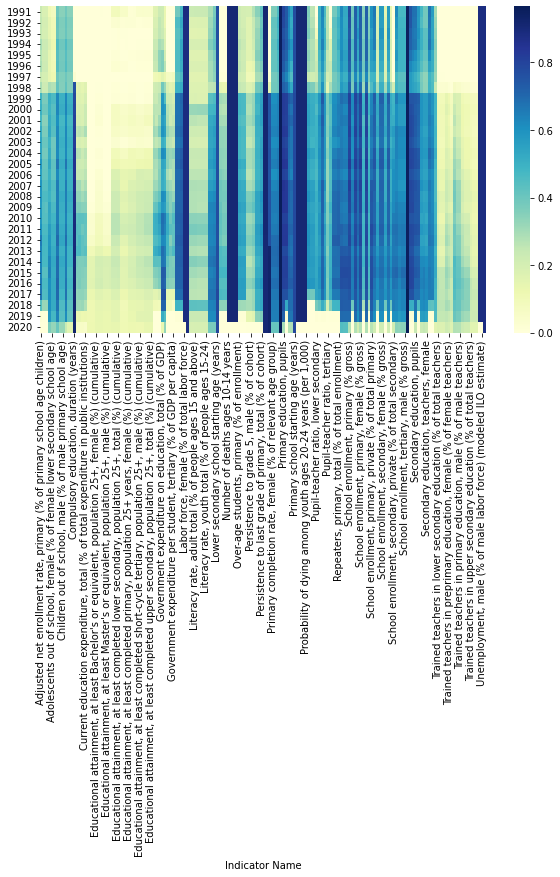

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(d1.T, cmap='YlGnBu')
plt.show()

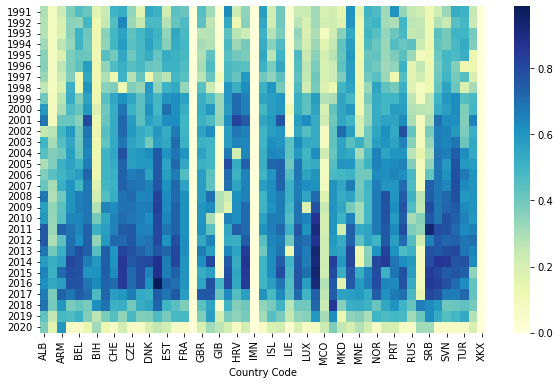

In [ ]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Country Code'] = df['Country Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [ ]:
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

columns_to_remove = ['Country Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Indicator Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Indicator Code'] = df['Indicator Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [ ]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
810,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
811,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
812,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
813,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
814,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42440,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42441,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42442,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from data import get_world_bank_data

df = get_world_bank_data()
df.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [ ]:
df = df.reset_index().melt(id_vars=['country_code', 'indicator_code'], var_name='year').pivot(index=['country_code', 'year'], columns='indicator_code', values='value')
df.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ALB          1991                   NaN                   NaN   
             1992                   NaN                   NaN   
             1993                   NaN                   NaN   
             1994                   NaN                   NaN   
             1995                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ALB          1991                   NaN                NaN                NaN   
             1992                   NaN                NaN                NaN   
             1993                   NaN                NaN                NaN   
             1994                   NaN                NaN                NaN   
             1995                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ALB          1991                NaN             NaN          NaN   
             1992                NaN             NaN          NaN   
             1993                NaN             NaN          NaN   
             1994                NaN             NaN          NaN   
             1995                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ALB          1991            1.00398            0.94971  ...          2.5   
             1992            1.01642            1.01280  ...          2.3   
             1993            1.03497            1.04385  ...          2.2   
             1994            0.98764            1.00526  ...          2.1   
             1995            0.96867            0.98171  ...          2.0   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ALB          1991          3.4          5.1          43.185995   
             1992          3.6          5.5          44.044715   
             1993          3.7          5.7          44.384730   
             1994          3.7          5.9          44.709003   
             1995          3.8          6.0          44.702003   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ALB          1991       1512840.0              15.60              16.69   
             1992       1513773.0              16.04              16.56   
             1993       1474435.0              16.64              16.42   
             1994       1438075.0              16.78              16.41   
             1995       1390620.0              16.79              16.39   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ALB          1991           16.22          32.894240          61.456989  
             1992           16.33          32.940005          61.232496  
             1993           16.52          32.902771          61.071314  
             1994           16.57          32.822494          60.946907  
             1995           16.57          32.742209          60.825311  

[5 rows x 162 columns]

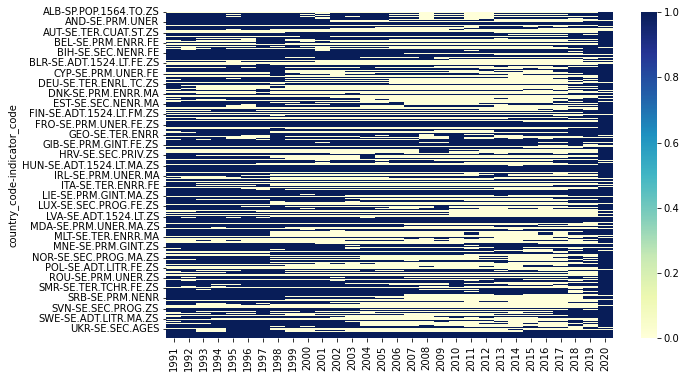

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='YlGnBu')
plt.show()

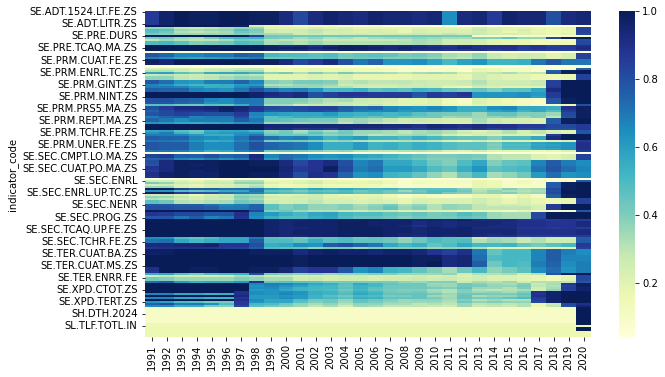

In [ ]:
df_indicator = df.isna().groupby(level='indicator_code').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(df_indicator, cmap='YlGnBu')
plt.show()

In [ ]:
df_indicator = df.notna().groupby(level='indicator_code').mean()
most_present = df_indicator[df_indicator.mean(axis=1) > 0.5]
most_present.index.values

array(['SE.COM.DURS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.PRSC.FM.ZS',
       'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.PRE.DURS',
       'SE.PRE.ENRL.TC.ZS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE',
       'SE.PRE.ENRR.MA', 'SE.PRM.AGES', 'SE.PRM.CMPT.FE.ZS',
       'SE.PRM.CMPT.MA.ZS', 'SE.PRM.CMPT.ZS', 'SE.PRM.DURS',
       'SE.PRM.ENRL', 'SE.PRM.ENRL.FE.ZS', 'SE.PRM.ENRL.TC.ZS',
       'SE.PRM.ENRR', 'SE.PRM.ENRR.FE', 'SE.PRM.ENRR.MA',
       'SE.PRM.GINT.FE.ZS', 'SE.PRM.GINT.MA.ZS', 'SE.PRM.GINT.ZS',
       'SE.PRM.NENR', 'SE.PRM.OENR.FE.ZS', 'SE.PRM.OENR.MA.ZS',
       'SE.PRM.OENR.ZS', 'SE.PRM.PRIV.ZS', 'SE.PRM.REPT.FE.ZS',
       'SE.PRM.REPT.MA.ZS', 'SE.PRM.REPT.ZS', 'SE.PRM.TCHR',
       'SE.PRM.TCHR.FE.ZS', 'SE.PRM.TENR', 'SE.PRM.UNER',
       'SE.PRM.UNER.ZS', 'SE.SEC.AGES', 'SE.SEC.DURS', 'SE.SEC.ENRL',
       'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.MA', 'SE.SE

In [ ]:
indicators = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'Metadata_Indicator_API_4_DS2_en_csv_v2_3160069.csv')
indicators[indicators.INDICATOR_CODE.isin(most_present.index.values)].to_csv('test.csv')

In [ ]:
df = pd.read_excel(settings.DATA_PATH / 'world_bank' / 'hlo_database.xlsx', sheet_name='HLO Database')
df.head()

,code,country,year,subject,level,sourcetest,n_res,hlo,hlo_se,hlo_m,hlo_m_se,hlo_f,hlo_f_se,region,incomegroup
0,AFG,Afghanistan,2016,reading,pri,EGRA,1,315.45505,3.308458,320.97153,3.391902,307.07355,3.379419,South Asia,Low income
1,AGO,Angola,2011,reading,pri,EGRA,1,263.13571,3.331610,264.67056,3.118905,261.24457,3.413112,Sub-Saharan Africa,Lower middle income
2,ALB,Albania,2000,math,sec,PISA,1,410.24564,3.530675,401.86014,3.530971,417.89243,3.512387,Europe & Central Asia,Upper middle income
3,ALB,Albania,2000,reading,sec,PISA,1,348.84952,3.290668,319.07059,4.248581,377.55408,2.699219,Europe & Central Asia,Upper middle income
4,ALB,Albania,2000,science,sec,PISA,1,413.51315,2.843401,404.18893,2.694698,422.99924,2.729117,Europe & Central Asia,Upper middle income


In [ ]:
from data import get_hlo_data

df = get_hlo_data()
df.head()

,code,country,year,subject,level,sourcetest,n_res,hlo,hlo_se,hlo_m,hlo_m_se,hlo_f,hlo_f_se,region,incomegroup
0,AFG,Afghanistan,2016,reading,pri,EGRA,1,315.45505,3.308458,320.97153,3.391902,307.07355,3.379419,South Asia,Low income
1,AGO,Angola,2011,reading,pri,EGRA,1,263.13571,3.331610,264.67056,3.118905,261.24457,3.413112,Sub-Saharan Africa,Lower middle income
2,ALB,Albania,2000,math,sec,PISA,1,410.24564,3.530675,401.86014,3.530971,417.89243,3.512387,Europe & Central Asia,Upper middle income
3,ALB,Albania,2000,reading,sec,PISA,1,348.84952,3.290668,319.07059,4.248581,377.55408,2.699219,Europe & Central Asia,Upper middle income
4,ALB,Albania,2000,science,sec,PISA,1,413.51315,2.843401,404.18893,2.694698,422.99924,2.729117,Europe & Central Asia,Upper middle income


In [ ]:
df = df.drop(columns=['country', 'sourcetest', 'n_res', 'hlo_se', 'hlo_m_se', 'hlo_f_se', 'region', 'incomegroup'])
df.head()

,code,year,subject,level,hlo,hlo_m,hlo_f
0,AFG,2016,reading,pri,315.45505,320.97153,307.07355
1,AGO,2011,reading,pri,263.13571,264.67056,261.24457
2,ALB,2000,math,sec,410.24564,401.86014,417.89243
3,ALB,2000,reading,sec,348.84952,319.07059,377.55408
4,ALB,2000,science,sec,413.51315,404.18893,422.99924


In [ ]:
len(df.code.unique())

164

In [ ]:
min(df.year.unique())

2000

In [ ]:
max(df.year.unique())

2017

In [ ]:
df = df.rename(columns={'code': 'country_code'})

In [ ]:
df.shape

(2023, 7)

In [ ]:
from data import get_education_data

edu = get_education_data()
edu.shape

(16226, 162)

In [ ]:
edu.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [ ]:
len(edu.reset_index().country_code.unique())

266

In [ ]:
len(edu.reset_index().year.unique())

61

In [ ]:
266 * 61

16226

In [ ]:
264 * 17

4488

In [ ]:
df.subject.unique()

array(['reading', 'math', 'science', 'average'], dtype=object)

In [ ]:
df.head()

,country_code,year,subject,level,hlo,hlo_m,hlo_f
0,AFG,2016,reading,pri,315.45505,320.97153,307.07355
1,AGO,2011,reading,pri,263.13571,264.67056,261.24457
2,ALB,2000,math,sec,410.24564,401.86014,417.89243
3,ALB,2000,reading,sec,348.84952,319.07059,377.55408
4,ALB,2000,science,sec,413.51315,404.18893,422.99924


In [ ]:
df = df.set_index(['country_code', 'year', 'subject', 'level'])

In [ ]:
df.groupby(['country_code', 'year']).mean()

hlo       hlo_m       hlo_f
country_code year                                    
AFG          2016  315.455050  320.971530  307.073550
AGO          2011  263.135710  264.670560  261.244570
ALB          2000  390.869437  375.039887  406.148583
             2009  405.799287  390.054260  422.369943
             2012  415.915333  412.478360  419.589937
...                       ...         ...         ...
ZMB          2007  300.744355  295.906690  305.330630
             2011  229.372570  231.196380  227.435940
             2013  335.791900         NaN         NaN
ZWE          2007  386.759600  388.862365  384.037705
             2013  389.554215         NaN         NaN

[755 rows x 3 columns]

In [14]:
from data import get_hlo_data, get_education_data

ed = get_education_data()
hlo = get_hlo_data()
ed.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [3]:
hlo.head()

hlo       hlo_m       hlo_f
country_code year                                    
AFG          2016  315.455050  320.971530  307.073550
AGO          2011  263.135710  264.670560  261.244570
ALB          2000  390.869437  375.039887  406.148583
             2009  405.799287  390.054260  422.369943
             2012  415.915333  412.478360  419.589937

In [2]:
ed.index

MultiIndex([('ABW', 1960),
            ('ABW', 1961),
            ('ABW', 1962),
            ('ABW', 1963),
            ('ABW', 1964),
            ('ABW', 1965),
            ('ABW', 1966),
            ('ABW', 1967),
            ('ABW', 1968),
            ('ABW', 1969),
            ...
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016),
            ('ZWE', 2017),
            ('ZWE', 2018),
            ('ZWE', 2019),
            ('ZWE', 2020)],
           names=['country_code', 'year'], length=16226)

In [15]:
df = ed.join(hlo)
df = df.sort_index(axis=1, level='year')
df.head()
df.to_csv('test.csv')

In [16]:
df.fillna(method='ffill', axis=0).to_csv('test.csv')

In [18]:
df.groupby('country_code').ffill().to_csv('test.csv')

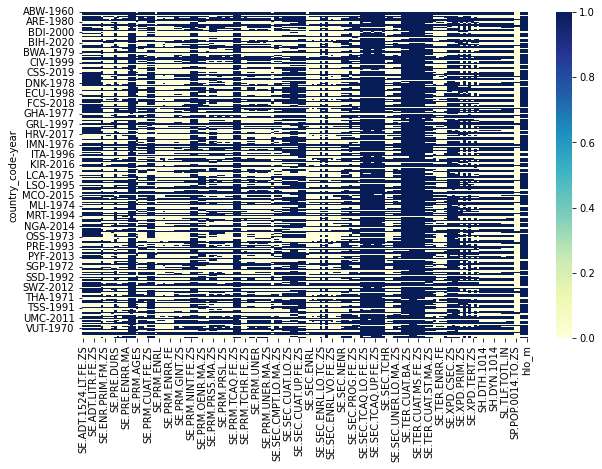

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby('country_code').ffill().isna(), cmap='YlGnBu')
plt.show()

In [9]:
df = df.fillna(method='ffill', axis=1)
df.head()
df.to_csv('test.csv')

In [1]:
from data import merged_data
df = merged_data()
df.head()

SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ALB          2001             99.498077                1.0013   
             2002             99.498077                1.0013   
             2003             99.498077                1.0013   
             2004             99.498077                1.0013   
             2005             99.498077                1.0013   

                   SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ALB          2001             99.368462           99.43515          98.252274   
             2002             99.368462           99.43515          98.252274   
             2003             99.368462           99.43515          98.252274   
             2004             99.368462           99.43515          98.252274   
             2005             99.368462           99.43515          98.252274   

                   SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ALB          2001          99.187607       98.712982          8.0   
             2002          99.187607       98.712982          8.0   
             2003          99.187607       98.712982          8.0   
             2004          99.187607       98.712982          8.0   
             2005          99.187607       98.712982          8.0   

                   SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SL.TLF.TOTL.IN  \
country_code year                                        ...                   
ALB          2001            1.01539            0.98732  ...       1319777.0   
             2002            0.99434            0.98732  ...       1313099.0   
             2003            1.00944            0.98732  ...       1300292.0   
             2004            1.01350            0.98020  ...       1286492.0   
             2005            1.00536            0.97804  ...       1271829.0   

                   SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.ZS  \
country_code year                                                         
ALB          2001              16.96              16.25           16.54   
             2002              16.99              16.34           16.61   
             2003              17.01              16.32           16.61   
             2004              16.94              16.22           16.52   
             2005              16.85              16.07           16.40   

                   SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS      gdppc  \
country_code year                                                    
ALB          2001          29.668045          63.017365  5285.8091   
             2002          28.932978          63.474770  5608.9623   
             2003          28.140171          63.972684  6004.6452   
             2004          27.323205          64.485625  6419.8704   
             2005          26.500886          64.998396  6858.4670   

                          hlo       hlo_f       hlo_m  
country_code year                                      
ALB          2001  390.869437  406.148583  375.039887  
             2002  390.869437  406.148583  375.039887  
             2003  390.869437  406.148583  375.039887  
             2004  390.869437  406.148583  375.039887  
             2005  390.869437  406.148583  375.039887  

[5 rows x 166 columns]

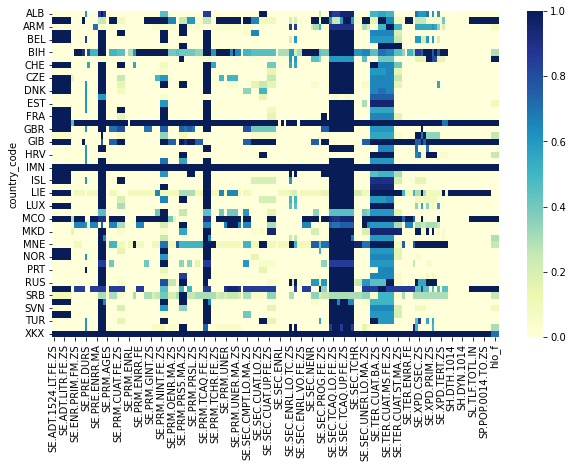

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().groupby('country_code').mean(), cmap='YlGnBu')
plt.show()

In [26]:
indicators = pd.read_csv('./data/world_bank/Metadata_Indicator_API_4_DS2_en_csv_v2_3160069.csv')
indicators = indicators.drop(columns=['SOURCE_ORGANIZATION', 'Unnamed: 4'])
indicators = indicators.rename(columns={'INDICATOR_CODE': 'indicator_code', 'INDICATOR_NAME': 'indicator_name'})
indicators = indicators.set_index('indicator_code')



In [27]:
indicators.head()

,indicator_name,SOURCE_NOTE
indicator_code,,
SP.POP.1564.TO.ZS,Population ages 15-64 (% of total population),Total population between the ages 15 to 64 as ...
SP.POP.0014.TO.ZS,Population ages 0-14 (% of total population),Population between the ages 0 to 14 as a perce...
SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",Unemployment refers to the share of the labor ...
SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",Unemployment refers to the share of the labor ...
SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force)...",Unemployment refers to the share of the labor ...


In [3]:
from data import merged_data, get_indicator_desc
df = merged_data(europe=False)
indc = get_indicator_desc()

df.head()

SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          2001             99.166367               1.00287   
             2002             99.166367               1.00287   
             2003             99.166367               1.00287   
             2004             99.166367               1.00287   
             2005             99.166367               1.00287   

                   SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          2001              98.88176          99.026413          97.071358   
             2002              98.88176          99.026413          97.071358   
             2003              98.88176          99.026413          97.071358   
             2004              98.88176          99.026413          97.071358   
             2005              98.88176          99.026413          97.071358   

                   SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          2001          97.537399       97.291252          NaN   
             2002          97.537399       97.291252          NaN   
             2003          97.537399       97.291252          NaN   
             2004          97.537399       97.291252          NaN   
             2005          97.537399       97.291252          NaN   

                   SE.PRE.ENRL.TC.ZS  SE.PRM.AGES  ...  SE.XPD.TOTL.GB.ZS  \
country_code year                                  ...                      
ABW          2001           25.59821          6.0  ...          21.320391   
             2002           23.72951          6.0  ...          19.757151   
             2003           21.52593          6.0  ...          19.757151   
             2004           20.11348          6.0  ...          14.897860   
             2005           19.59028          6.0  ...          18.900709   

                   SE.XPD.TOTL.GD.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  \
country_code year                                                            
ABW          2001            4.73986          22.918685          69.323344   
             2002            4.92365          22.622958          69.421636   
             2003            4.92365          22.277539          69.554820   
             2004            4.40848          21.882374          69.734750   
             2005            4.68132          21.473343          69.935320   

                   country_name  gdppc  hlo  hlo_f  hlo_m  population  
country_code year                                                      
ABW          2001         Aruba    NaN  NaN    NaN    NaN         NaN  
             2002         Aruba    NaN  NaN    NaN    NaN         NaN  
             2003         Aruba    NaN  NaN    NaN    NaN         NaN  
             2004         Aruba    NaN  NaN    NaN    NaN         NaN  
             2005         Aruba    NaN  NaN    NaN    NaN         NaN  

[5 rows x 88 columns]

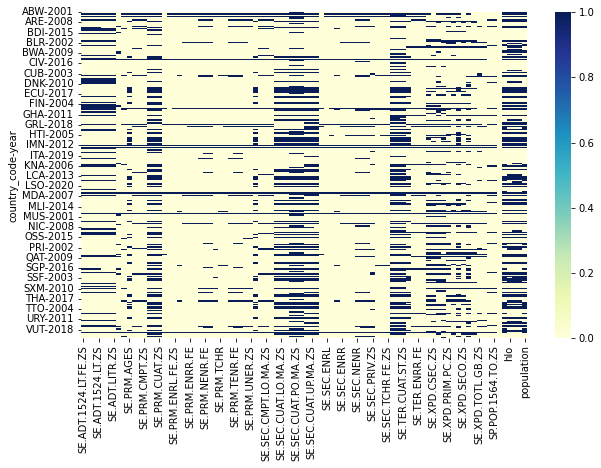

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby('country_code').bfill().isna(), cmap='YlGnBu')
plt.show()

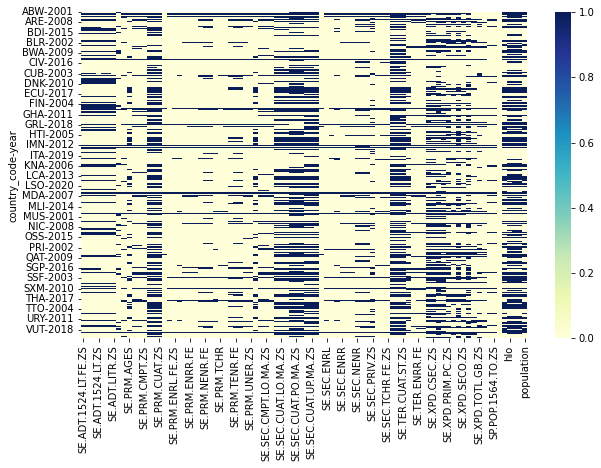

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='YlGnBu')
plt.show()

In [2]:
from data import get_hlo_data

df = get_hlo_data()
df.head()

hlo      hlo_m      hlo_f
country_code year subject level                                 
AFG          2016 reading pri    315.45505  320.97153  307.07355
AGO          2011 reading pri    263.13571  264.67056  261.24457
ALB          2000 math    sec    410.24564  401.86014  417.89243
                  reading sec    348.84952  319.07059  377.55408
                  science sec    413.51315  404.18893  422.99924

In [6]:
df.groupby(['country_code', 'year', 'level']).mean().to_csv('test.csv')